In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import random

In [2]:
fiftyComp=pd.read_excel('排名.xlsx')#.head(50)
row=pd.read_excel('1.xlsx')
fiftyComp['材料分类']=[0 for i in range(fiftyComp.shape[0])]
for i in range(fiftyComp.shape[0]):
    fiftyComp['材料分类'].loc[i]=row[row['供应商ID']==fiftyComp['供应商ID'].iloc[i]]['材料分类'].iloc[0]

C:\ProgramData\Miniconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [3]:
fiftyComp=fiftyComp.sort_values(by='材料分类')
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
fiftyComp

,供应商ID,平均供货量,平均满意度,满意度方差,订单完成率,企业最大产能,得分,材料分类
103,S152,3.646044,0.958487,0.530346,0.681818,7.292088,0.159852,A
277,S205,1.257246,0.421667,0.495620,0.130435,2.514493,0.060831,A
276,S187,1.419147,0.374738,0.438107,0.166667,2.838294,0.060958,A
275,S341,1.479469,0.423666,0.418541,0.173913,2.958937,0.061207,A
126,S122,2.375000,0.841435,0.574745,0.611111,4.750000,0.147989,A
...,...,...,...,...,...,...,...,...
239,S136,1.143519,0.540000,0.552623,0.200000,2.287037,0.075198,C
163,S349,1.966049,0.827037,0.546498,0.466667,3.932099,0.121632,C
102,S025,2.962963,1.030345,0.424727,0.695652,5.925926,0.160436,C
159,S039,6.713969,0.709306,0.619418,0.478261,13.427939,0.125718,C


In [91]:
nums=402
fifteenComp=fiftyComp.head(nums)
fifteenComp

,供应商ID,平均供货量,平均满意度,满意度方差,订单完成率,企业最大产能,得分,材料分类
103,S152,3.646044,0.958487,0.530346,0.681818,7.292088,0.159852,A
277,S205,1.257246,0.421667,0.495620,0.130435,2.514493,0.060831,A
276,S187,1.419147,0.374738,0.438107,0.166667,2.838294,0.060958,A
275,S341,1.479469,0.423666,0.418541,0.173913,2.958937,0.061207,A
126,S122,2.375000,0.841435,0.574745,0.611111,4.750000,0.147989,A
...,...,...,...,...,...,...,...,...
239,S136,1.143519,0.540000,0.552623,0.200000,2.287037,0.075198,C
163,S349,1.966049,0.827037,0.546498,0.466667,3.932099,0.121632,C
102,S025,2.962963,1.030345,0.424727,0.695652,5.925926,0.160436,C
159,S039,6.713969,0.709306,0.619418,0.478261,13.427939,0.125718,C


In [92]:
fifteenComp['企业最大产能'].mean()*nums

64652.774944327815

<BarContainer object of 3 artists>

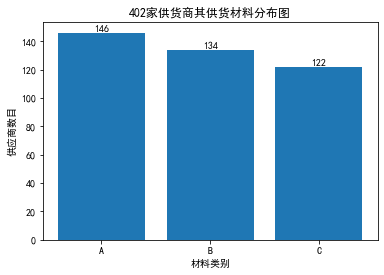

In [95]:
x=fifteenComp['材料分类'].value_counts().keys()
y=[fifteenComp['材料分类'].value_counts()[i] for i in x]
plt.title('402家供货商其供货材料分布图')
plt.xlabel('材料类别')
plt.ylabel('供应商数目')
for a,b in zip(x,y):
    plt.text(a, b+0.01, '%.0f' % b, ha='center', va= 'bottom',fontsize=10)
plt.bar(x,y)


Text(0.5, 1.0, '订购、供货、实际可用单位原材料预测曲线')

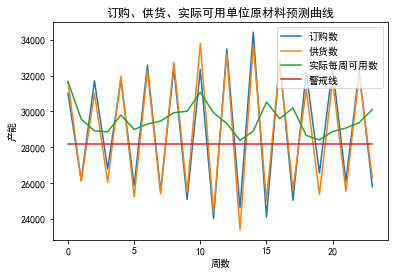

In [211]:
rate={'A':0.6,'B':0.66,'C':0.72}
fifteenComp.sort_values(by=['材料分类'],inplace=True)
ans=[]
output=[28200]
ding=[0]
real=[]
target=28200*1.1
order={'A':[[] for i in range(24)],'B':[[] for i in range(24)],'C':[[] for i in range(24)]}
for j in range(1,25):
    res=[]
    res2=[]
    for i in range(fifteenComp.shape[0]):
        v=fifteenComp.iloc[i]['企业最大产能']*random.uniform(0.95,1.05)*fifteenComp.iloc[i]['订单完成率']
        if v<=target:
            target-=v
            res.append(v*rate[fifteenComp.iloc[i]['材料分类']])
            res2.append(v)
            order[fifteenComp.iloc[i]['材料分类']][j-1].append(v*rate[fifteenComp.iloc[i]['材料分类']])
        else:
            order[fifteenComp.iloc[i]['材料分类']][j-1].append(target*rate[fifteenComp.iloc[i]['材料分类']])
            res.append(target*rate[fifteenComp.iloc[i]['材料分类']])
            res2.append(target)
            target=0
    ans.append(res)
    ding.append(sum(res2))
    op=sum(res2)*random.uniform(0.95,1.05)
    
    target=2.05*28200-op
    real.append(op+(output[-1]-28200))
    output.append(op)
plt.plot(range(24),ding[1:])
plt.plot(range(24),output[1:])
plt.plot(range(24),real)
plt.plot(range(24),[28200]*24)
plt.xticks=[i for i in range(1,25)]
plt.legend(['订购数','供货数','实际每周可用数','警戒线'])
plt.xlabel('周数')
plt.ylabel('产能')
plt.title('订购、供货、实际可用单位原材料预测曲线')

In [212]:
from numpy import transpose
data = ans
transposed = transpose(data).tolist()
dp={}
for i in range(nums):
    dp[fifteenComp['供应商ID'].iloc[i]]=transposed[i]

In [213]:
dingdan=pd.DataFrame(dp).T

In [4]:
fee=pd.read_excel('2.xlsx')

In [5]:
t2=fee.columns
avgfee=pd.DataFrame()
avgfee['转运商ID']=fee['转运商ID']
for i in range(1,25):
    avgfee[t2[i]]=[0 for i in range(fee.shape[0])]

In [6]:
for idx in range(fee.shape[0]):
    for i in range(0,24):
        a=[]
        for j in range(1,239,24):
            if fee[t2[j+i]].iloc[idx]!=0:
                a.append(fee[t2[j+i]].iloc[idx])
        avgfee[t2[i+1]].loc[idx]=pd.Series(a).mean()
t=avgfee.columns[1:]
for i in range(8):
    avgfee.loc[i]=avgfee.loc[i].fillna(avgfee[t].loc[i].mean())

C:\ProgramData\Miniconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\18249\AppData\Local\Temp/ipykernel_4212/1053838765.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  avgfee[t2[i+1]].loc[idx]=pd.Series(a).mean()


In [217]:
avgfee.to_excel('fee_avg2.xlsx')
avgfee

,转运商ID,W001,W002,W003,W004,W005,W006,W007,W008,W009,...,W015,W016,W017,W018,W019,W020,W021,W022,W023,W024
0,T1,1.858110,2.165130,1.410360,1.328640,1.070760,1.211510,1.162390,1.36925,2.233130,...,2.265730,2.540450,2.187330,1.957770,1.785390,1.923760,1.875590,1.811840,1.947860,1.840190
1,T2,0.868770,1.117000,0.691470,1.010610,0.815580,1.134720,0.868770,1.01062,0.992880,...,0.797850,1.046070,0.851040,0.620550,0.868770,1.010610,0.868770,0.780120,0.868770,0.780120
2,T3,0.118700,0.453200,0.109250,0.259000,0.100340,0.582700,0.125878,0.16190,0.137562,...,0.111511,0.453200,0.129489,0.388500,0.121400,0.161900,0.117337,0.906400,0.119780,0.388500
3,T4,0.521057,1.541750,1.796900,1.018600,1.207550,1.361300,1.354900,1.80440,1.383700,...,1.401612,0.832662,1.402688,1.262786,1.168217,2.532120,1.584680,1.834025,1.755025,2.431867
4,T5,2.299728,0.579700,2.299728,2.299728,2.299728,2.299728,2.299728,0.28990,2.983083,...,3.369575,3.478257,2.971038,3.405800,1.811600,1.594200,0.579700,0.289900,0.289900,4.637700
5,T6,0.006900,0.036770,0.049220,3.586250,2.514610,5.000000,0.179620,0.11347,0.072910,...,0.008880,0.008350,0.013630,0.004770,0.006660,0.004578,0.020800,0.003700,0.001720,0.002800
6,T7,1.132070,1.083170,1.432560,1.474470,1.705100,1.544380,1.222910,1.34173,2.090140,...,2.499300,3.926270,3.996160,2.397620,2.065340,2.006300,2.215930,2.890630,1.785810,1.771840
7,T8,0.644080,1.001179,1.001179,1.001179,0.762733,1.118660,0.559340,1.08475,1.305070,...,0.593240,1.898320,5.000000,0.661020,0.564989,0.711880,0.576290,0.661030,0.677980,0.745780


In [218]:
a=list(avgfee.columns[1:])
#a.insert(0,'供应商ID')
dingdan.columns=a
pd.DataFrame(dp).T.to_excel('p3_dingdan.xlsx')

In [219]:
p2_convey=pd.DataFrame()
p2_convey['供应商ID']=fifteenComp['供应商ID']
for i in range(24):
    p2_convey[avgfee.columns[1+i]]=[[] for i in range(p2_convey.shape[0])]

In [220]:
t3=avgfee.columns
loss={'A':[[] for i in range(24)],'B':[[] for i in range(24)],'C':[[] for i in range(24)]}
p2_convey

,供应商ID,W001,W002,W003,W004,W005,W006,W007,W008,W009,...,W015,W016,W017,W018,W019,W020,W021,W022,W023,W024
103,S152,[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
24,S123,[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
361,S208,[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
128,S211,[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
129,S115,[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,S183,[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
138,S271,[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
390,S100,[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
95,S133,[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]


In [7]:
vt=[]
fee['订单数']=range(fee.shape[0])
for i in range(fee.shape[0]):
    fee['订单数'].loc[i]=240
    if 0 in fee[fee.columns[1:]].loc[i].value_counts().keys():
        fee['订单数'].loc[i]=240-fee[fee.columns[1:]].loc[i].value_counts()[0]
    vt.append(fee['订单数'].loc[i])
alldingdan=sum(vt)
fee['订单数']=fee['订单数']/alldingdan
fee['订单数']=1/fee['订单数']
fee['订单数']=fee['订单数']/max(fee['订单数'])
mp=dict(zip(p2_convey['供应商ID'].to_list(),p2_convey['供应商ID'].keys()))
dingdan=pd.DataFrame(dp).T
a=list(avgfee.columns[1:])
#a.insert(0,'供应商ID')
dingdan.columns=a
ans=[{} for i in range(24)]
for i in range(24):
    convey=[0 for i in range(8)]
    tp=avgfee.sort_values(by=[t3[i+1]])[t3[i+1]]
    key=list((avgfee[t3[i+1]]*fee['订单数']).sort_values().keys())
    comp=list(dingdan[t3[i+1]].keys())
    nowDingdan=dingdan[t3[i+1]].copy()
    while comp:
        nowCom=comp.pop()
        if nowDingdan[nowCom]>0:
            for j in range(8):
                if convey[j]>=6000:
                    p2_convey[t3[i+1]][mp[nowCom]].append(0)
                elif nowDingdan[nowCom]+convey[j]<=6000:
                    p2_convey[t3[i+1]][mp[nowCom]].append(nowDingdan[nowCom])
                    convey[j]+=nowDingdan[nowCom]
                    loss[fifteenComp[fifteenComp['供应商ID']==nowCom]['材料分类'].iloc[0]][i].append(nowDingdan[nowCom]*avgfee[t3[i+1]][j]/100)
                    nowDingdan[nowCom]=0
                else:
                    p2_convey[t3[i+1]][mp[nowCom]].append(0)
                    '''
                    p2_convey[t3[i+1]][mp[nowCom]].append(6000-convey[j])
                    nowDingdan[nowCom]-=(6000-convey[j])
                    convey[j]=6000'''
        #p2_convey[t3[i+1]][mp[nowCom]]=pd.DataFrame(p2_convey[t3[i+1]][mp[nowCom]]).values
        ans[i][nowCom]=p2_convey[t3[i+1]][mp[nowCom]]
        if ans[i][nowCom]==[]:ans[i][nowCom]=[0 for i in range(8)]
        

NameError: name 'p2_convey' is not defined

In [8]:
p2_convey.to_excel('3convey.xlsx')
p2_convey

0    0.345833
1    0.345833
2    0.709402
3    0.813725
4    1.000000
5    0.384259
6    0.345833
7    0.408867
Name: 订单数, dtype: float64

In [226]:
w1=pd.DataFrame(ans[0]).T.reset_index()
w2=pd.DataFrame(ans[1]).T.reset_index()
a=pd.merge(w1,w2,on='index')
for i in range(2,len(ans)):
    a=pd.merge(a,pd.DataFrame(ans[i]).T.reset_index(),on='index')

C:\Users\18249\AppData\Local\Temp/ipykernel_5952/3799567541.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'5_x', '6_x', '7_x', '0_x', '1_x', '3_x', '2_x', '4_x'} in the result is deprecated and will raise a MergeError in a future version.
  a=pd.merge(a,pd.DataFrame(ans[i]).T.reset_index(),on='index')


In [227]:
p2_c=pd.read_excel('P2_c.xlsx')
p2_c=pd.merge(p2_c,a,on='index',how='outer')
p2_c=p2_c.fillna(0)
p2_c.to_excel('3convey2.xlsx')

In [228]:
Aloss=[]
Bloss=[]
Closs=[]
for i in range(24):
    Aloss.append(sum(loss['A'][i])/sum(order['A'][i]))
    Bloss.append(sum(loss['B'][i])/sum(order['B'][i]))
    Closs.append(sum(loss['C'][i])/sum(order['C'][i]))

C:\Users\18249\AppData\Local\Temp/ipykernel_5952/369540621.py:7: RuntimeWarning: invalid value encountered in double_scalars
  Closs.append(sum(loss['C'][i])/sum(order['C'][i]))


Text(0, 0.5, '损耗率')

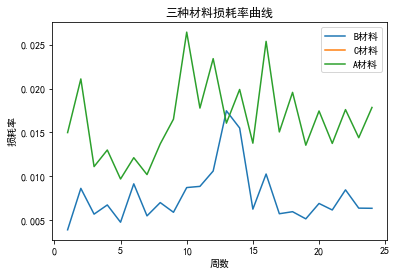

In [229]:
plt.plot(range(1,25),Aloss)
plt.plot(range(1,25),Closs)
plt.plot(range(1,25),Bloss)
plt.title('三种材料损耗率曲线')
plt.legend(['B材料','C材料','A材料'])
plt.xlabel('周数')
plt.ylabel('损耗率')

In [230]:
sum(order['A'][0])

10190.134577914558

In [231]:
sum(loss['A'][0])

39.50515221266897